In [61]:
from pylab import *
import matplotlib
import matplotlib.gridspec as gridspec
%matplotlib inline
from scipy.stats import kde

nbins = 50
RDM=np.loadtxt("../RDM/M-vt-roff-fs.txt")
CSF=np.loadtxt("../CSF/M-vt-roff-fs.txt")
AGN=np.loadtxt("../AGN/M-vt-roff-fs.txt")

In [62]:
print(AGN[57,:],AGN[73,:])##relaxed & un-relaxed
RDM[:,2]=np.log10(RDM[:,2]); RDM[:,3]=np.log10(RDM[:,3])
CSF[:,2]=np.log10(CSF[:,2]); CSF[:,3]=np.log10(CSF[:,3])
AGN[:,2]=np.log10(AGN[:,2]); AGN[:,3]=np.log10(AGN[:,3])

(array([  1.44736225e+01,   9.22995389e-01,   6.00505805e-03,
         1.84621606e-02]), array([ 14.47078922,   0.97057323,   0.600446  ,   0.10462993]))


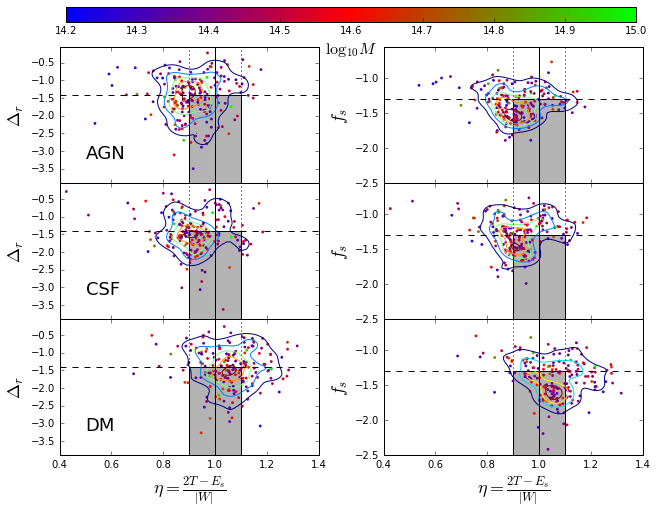

In [89]:
#f1,(ax1, ax2)=subplots(1, 2,sharex='row',sharey='all')
#f1.set(figwidth=9,figheight=4)
f1=figure(1,figsize=(9,7),dpi=250)
#ax1=f1.add_subplot(1,2,1); ax2=f1.add_subplot(1,2,2)
gs  = gridspec.GridSpec(3, 2,width_ratios=[1,1])
ax1=subplot(gs[0]); ax2=subplot(gs[1],sharex=ax1)
ax3=subplot(gs[2],sharey=ax1,sharex=ax1); ax4=subplot(gs[3],sharey=ax2,sharex=ax1)
ax5=subplot(gs[4],sharey=ax1,sharex=ax1); ax6=subplot(gs[5],sharey=ax2,sharex=ax1)
ax1.set_position([0.08, 0.10,  0.4, 0.27], which=u'both')
ax2.set_position([0.58, 0.10,  0.4, 0.27], which=u'both')
ax3.set_position([0.08, 0.37,  0.4, 0.27], which=u'both')
ax4.set_position([0.58, 0.37,  0.4, 0.27], which=u'both')
ax5.set_position([0.08, 0.64,  0.4, 0.27], which=u'both')
ax6.set_position([0.58, 0.64,  0.4, 0.27], which=u'both')
setp([aa.get_xticklabels() for aa in [ax5,ax6,ax3,ax4]], visible=False)
# ax1.set_yscale("log");ax2.set_yscale("log")
# ax3.set_yscale("log");ax4.set_yscale("log")
# ax5.set_yscale("log");ax6.set_yscale("log")

for i in range(6):
    if i == 0:
        axx=ax1; x = RDM[:,1]; y = RDM[:,2]; m = RDM[:,0]
    elif i == 1:
        axx=ax2; x = RDM[:,1]; y = RDM[:,3]; m = RDM[:,0]
    elif i == 2:
        axx=ax3; x = CSF[:,1]; y = CSF[:,2]; m = CSF[:,0]
    elif i == 3:
        axx=ax4; x = CSF[:,1]; y = CSF[:,3]; m = CSF[:,0]
    elif i == 4:
        axx=ax5; x = AGN[:,1]; y = AGN[:,2]; m = AGN[:,0]
    elif i == 5:
        axx=ax6; x = AGN[:,1]; y = AGN[:,3]; m = AGN[:,0]
        
    k = kde.gaussian_kde(np.array([x,y]),bw_method=0.3)
    xi, yi = np.mgrid[x.min():x.max():nbins*1j, y.min():y.max():nbins*1j]
    zi = k(np.vstack([xi.flatten(), yi.flatten()]))

    p1=axx.scatter(x,y,s=8.,c=m,\
                marker="o",edgecolor='none',cmap='brg',vmin=14.2,vmax=15)
    CS = axx.contour(xi, yi, zi.reshape(xi.shape),5)
    
    if i%2 == 0:
        axx.fill_between([0.9,1.1],-4,np.log10(0.04),facecolor='0.7',zorder=-2)
    else:
        axx.fill_between([0.9,1.1],-4,np.log10(0.05),facecolor='0.7',zorder=-2)
    #clabel(CS, inline=1, fontsize=8)

# ax3.scatter(CSF[:,1],CSF[:,2],s=25.,c=CSF[:,0],\
#             marker="s",edgecolor='none',cmap='brg',vmin=14.2,vmax=15,label="CSF")
# ax5.scatter(AGN[:,1],AGN[:,2],s=45.,c=AGN[:,0],\
#             marker="*",edgecolor='none',cmap='brg',vmin=14.2,vmax=15,label="AGN")
ax1.set_ylim(-3.9,-0.05)
ax1.set_xlim(0.4,1.4)
ax1.set_xlabel(r"$\eta = \frac{2T - E_s}{|W|}$", fontsize=18)
ax1.set_ylabel(r"$\Delta_r$", fontsize=18); ax1.text(0.5, -3.2, 'DM', fontsize=18)
ax3.set_ylabel(r"$\Delta_r$", fontsize=18); ax3.text(0.5, -3.2, 'CSF', fontsize=18)
ax5.set_ylabel(r"$\Delta_r$", fontsize=18); ax5.text(0.5, -3.2, 'AGN', fontsize=18)

# p1=ax2.scatter(RDM[:,1],RDM[:,3],s=25.,c=RDM[:,0],\
#             marker="o",edgecolor='none',cmap='brg',vmin=14.2,vmax=15,label="DM")
# ax4.scatter(CSF[:,1],CSF[:,3],s=25.,c=CSF[:,0],\
#             marker="s",edgecolor='none',cmap='brg',vmin=14.2,vmax=15,label="CSF")
# ax6.scatter(AGN[:,1],AGN[:,3],s=45.,c=AGN[:,0],\
#             marker="*",edgecolor='none',cmap='brg',vmin=14.2,vmax=15,label="AGN")
ax2.set_ylim(-2.5,-0.55)
ax2.set_xlabel(r"$\eta = \frac{2T - E_s}{|W|}$", fontsize=18)
ax2.set_ylabel(r"$f_s$", fontsize=18)
ax4.set_ylabel(r"$f_s$", fontsize=18)
ax6.set_ylabel(r"$f_s$", fontsize=18)
# ax2.legend(loc=4,numpoints=1)
# ax4.legend(loc=4,numpoints=1)
# ax6.legend(loc=4,numpoints=1)

setp([aa.plot([1.,1],[-4,0],'k-') for aa in [ax5,ax6,ax3,ax4,ax1,ax2]])
setp([aa.plot([1.1,1.1],[-4,0],'k:') for aa in [ax5,ax6,ax3,ax4,ax1,ax2]])
setp([aa.plot([.9,.9],[-4,0],'k:') for aa in [ax5,ax6,ax3,ax4,ax1,ax2]])
setp([aa.plot([.4,1.4],[np.log10(0.04),np.log10(0.04)],'k--') for aa in [ax5,ax3,ax1]])
setp([aa.plot([.4,1.4],[np.log10(.05),np.log10(.05)],'k--') for aa in [ax6,ax4,ax2]])
cbar_ax = f1.add_axes([0.09, 0.96, 0.88, 0.03])
c1=f1.colorbar(p1,cax=cbar_ax, orientation='horizontal') #)ax=[ax1,ax2],
c1.set_label(r"$\log_{10} M$", fontsize=16)

#tight_layout()
f1.savefig("plots/theoretical-dynamics.eps")

In [90]:
print(RDM[np.where((RDM[:,1]>=1.1)&(RDM[:,2]<-2.5))[0]]); print(np.log10(0.05)); print(np.where((RDM[:,1]>=1.1)&(RDM[:,2]<-2.5))[0])

[[ 14.30530728   1.17371041  -3.07563398  -1.19357032]
 [ 14.53000894   1.10481484  -2.51691407  -1.68152306]]
-1.30102999566
[ 12 137]


In [91]:
print(RDM[np.where((RDM[:,1]>=1.1)&(RDM[:,3]<-1.75))[0]]); print(np.log10(0.04)); np.where((RDM[:,1]>=1.1)&(RDM[:,3]<-1.75))[0]

[[ 14.30557958   1.19220817  -1.33398047  -1.89185754]
 [ 14.37169784   1.12569748  -2.08540709  -1.75722685]
 [ 14.5766467    1.10742582  -1.72698459  -2.06666712]]
-1.39794000867


array([ 16,  47, 167])

In [88]:
print(CSF[np.where((CSF[:,1]<=0.9)&(CSF[:,2]<-2.5))[0]])
print(AGN[np.where((AGN[:,1]<=0.9)&(AGN[:,2]<-2.5))[0]])

[[ 14.4018185    0.87155662  -3.01536535  -1.21708593]]
[[ 14.92624242   0.87888246  -2.6914165   -1.35627296]
 [ 14.57411658   0.84161033  -3.10668378  -1.48530995]]


In [86]:
print(CSF[np.where((CSF[:,1]<=0.9)&(CSF[:,3]<-1.7))[0]])

[[ 14.32036073   0.83843639  -1.87672856  -1.796737  ]
 [ 14.39012785   0.87997548  -2.02778041  -1.78417238]
 [ 14.58992535   0.81541108  -1.82215205  -1.75625634]
 [ 14.52859792   0.8709126   -1.10781108  -1.7282149 ]
 [ 14.37811956   0.84119242  -2.11359065  -1.89349413]
 [ 14.31520294   0.89752932  -2.16237768  -1.80937286]]


In [65]:
iddm=np.where((RDM[:,1]<=1.1)&(RDM[:,1]>=0.9)&(RDM[:,2]<0.07)&(RDM[:,3]<0.1))[0]
idcsf=np.where((CSF[:,1]<=1.1)&(CSF[:,1]>=0.9)&(CSF[:,2]<0.07)&(CSF[:,3]<0.1))[0]
idagn=np.where((AGN[:,1]<=1.1)&(AGN[:,1]>=0.9)&(AGN[:,2]<0.07)&(AGN[:,3]<0.1))[0]
print(iddm,idcsf,idagn)

(array([  0,   1,   2,   3,   5,   6,   7,   9,  13,  14,  15,  17,  18,
        19,  20,  21,  22,  23,  26,  28,  34,  36,  38,  39,  41,  42,
        43,  44,  46,  54,  55,  56,  57,  58,  59,  61,  62,  63,  64,
        65,  66,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,  79,
        80,  82,  84,  86,  87,  89,  90,  91,  93,  94,  95,  96,  97,
        98, 104, 106, 107, 108, 109, 110, 112, 113, 118, 119, 120, 121,
       122, 128, 129, 130, 131, 132, 133, 134, 135, 136, 138, 139, 140,
       141, 143, 145, 148, 149, 151, 153, 154, 155, 156, 159, 161, 165,
       169, 174, 178, 179, 180, 181]), array([  4,   6,   8,  12,  13,  14,  17,  21,  23,  25,  26,  30,  33,
        34,  35,  37,  38,  39,  40,  41,  42,  43,  45,  47,  48,  49,
        50,  52,  55,  56,  57,  58,  60,  62,  63,  64,  67,  73,  74,
        77,  78,  81,  85,  86,  91,  92,  93,  94,  98,  99, 100, 102,
       103, 104, 105, 106, 108, 111, 112, 115, 123, 124, 126, 129, 131,
       132, 137, 138, 13

In [66]:
from match2arr import match2arr
print(iddm.size/184.,idcsf.size/184.,idagn.size/184.)
print(match2arr(iddm,idcsf))
print(match2arr(iddm,idagn))

(0.5978260869565217, 0.5271739130434783, 0.5108695652173914)
(47, array([-1, -1, -1, -1, -1,  1, -1, -1,  4,  5, -1,  6, -1, -1, -1,  7, -1,
        8, 10, -1, 13, -1, 16, 17, 19, 20, 21, -1, -1, -1, 28, 29, 30, 31,
       -1, -1, 33, 34, 35, -1, -1, -1, -1, -1, -1, -1, 37, 38, -1, -1, 39,
       -1, -1, -1, -1, 43, -1, -1, -1, 44, 46, 47, -1, -1, -1, 48, 53, 55,
       -1, 56, -1, -1, 58, -1, -1, -1, -1, -1, -1, -1, 63, -1, 64, 65, -1,
       -1, -1, -1, 67, 68, 69, -1, -1, 72, -1, -1, -1, -1, -1, -1, 75, -1,
       78, 81, -1, 88, 91, 92, 93, 94], dtype=int32))
(41, array([-1, -1,  0, -1,  2,  3, -1, -1,  7,  8, -1, 10, -1, -1, -1, 11, -1,
       12, -1, 14, 18, -1, -1, -1, 21, 22, -1, -1, -1, -1, 29, 30, 31, 32,
       -1, -1, 34, 35, 36, -1, -1, -1, -1, -1, -1, -1, 38, -1, -1, 39, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, 44, 46, 47, -1, -1, -1, 48, -1, -1,
       -1, -1, -1, -1, 56, -1, -1, -1, -1, -1, -1, -1, 61, -1, 62, 63, -1,
       -1, 64, -1, 66, -1, 67, -1, -1, -1, -1, -1,

In [67]:
print(iddm.size,idcsf.size,idagn.size,34./iddm.size,28./iddm.size)

(110, 97, 94, 0.3090909090909091, 0.2545454545454545)


In [68]:
from mesh import mesh
AGN1=np.copy(AGN)
AGN1[:,2]=np.log10(AGN1[:,2]); AGN1[:,3]=np.log10(AGN1[:,3])
agn_den1=mesh(AGN1[:,1:2])

/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:3: RuntimeWarning: invalid value encountered in log10
  app.launch_new_instance()


In [69]:
agn_den1.max(),agn_den1[0]

(184.0, 184.0)

TypeError: Invalid dimensions for image data

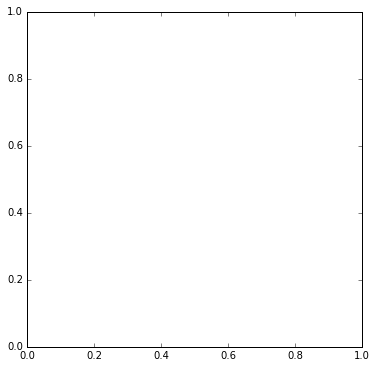

In [70]:
f2=figure(2,figsize=(6,10))
axx=f2.add_subplot(111)
axx.imshow(agn_den1)